First 5 rows:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None

Mi

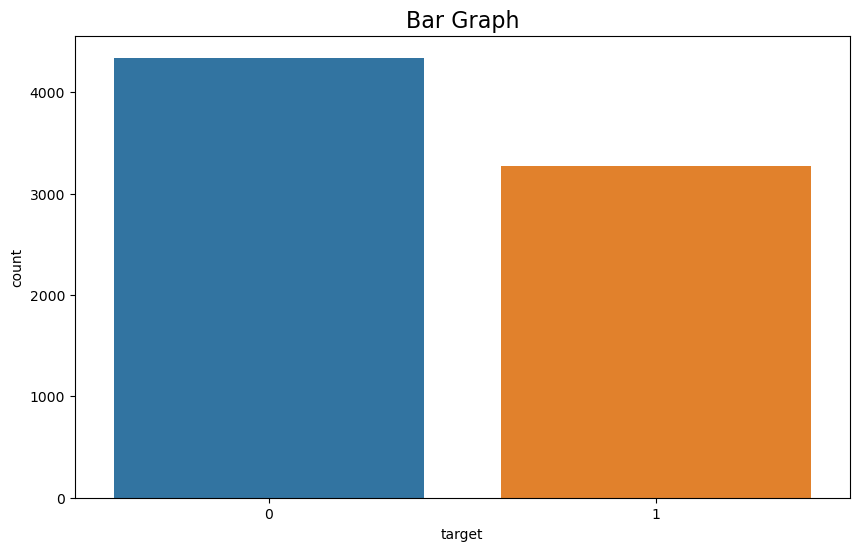

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Loading datasets
training_data = pd.read_csv(r'C:\Users\aniru\OneDrive\Desktop\Multimodal Sentiment Analysis\train.csv')
test_data = pd.read_csv(r'C:\Users\aniru\OneDrive\Desktop\Multimodal Sentiment Analysis\test.csv')

# Basic information
print("First 5 rows:")
print(training_data.head())
print("\nData Information:")
print(training_data.info())
print("\nMissing Values:")
print(training_data.isnull().sum())
print("\nUnique Values in Each Column:")
print(training_data.nunique())

# Checking missing values
print(training_data.isnull().sum())

# Filling Missing values
training_data['keyword'].fillna('none', inplace=True)
training_data['location'].fillna('unknown', inplace=True)

# Bar Plot for Categorical Data
if 'target' in training_data.columns:  # Replace with a column name
    plt.figure(figsize=(10, 6))
    sns.countplot(data=training_data, x='target')
    plt.title('Bar Graph', fontsize=16)
    plt.show()


In [20]:
!pip install spacy
import spacy
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

def preprocess_text(text):
    # Remove Special Characters, Numbers, and Punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    #Lemmatization
    doc = nlp(text)
    #Lemmatization and Stemming
    words = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
nlp = spacy.load("en_core_web_sm")

# Apply preprocessing
training_data['cleaned_text'] = training_data['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words
vectorizer_bow = CountVectorizer(max_features=5000)
X_bow = vectorizer_bow.fit_transform(training_data['cleaned_text']).toarray()

# TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer_tfidf.fit_transform(training_data['cleaned_text']).toarray()

# Target variable
y = training_data['target']

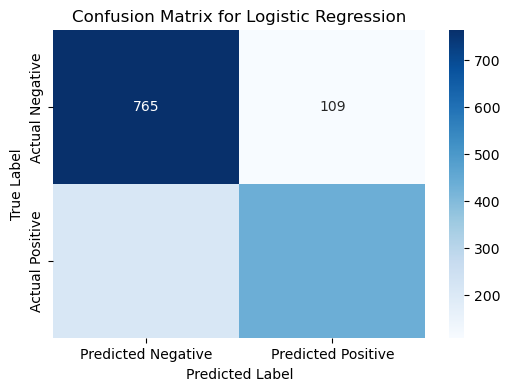

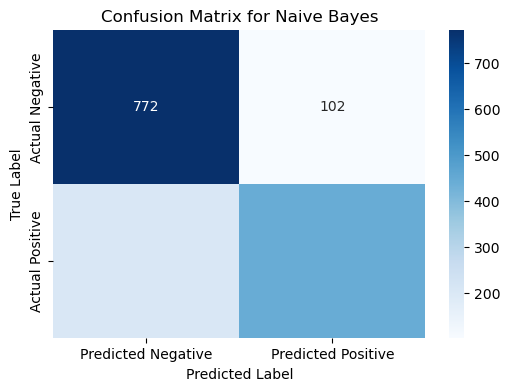

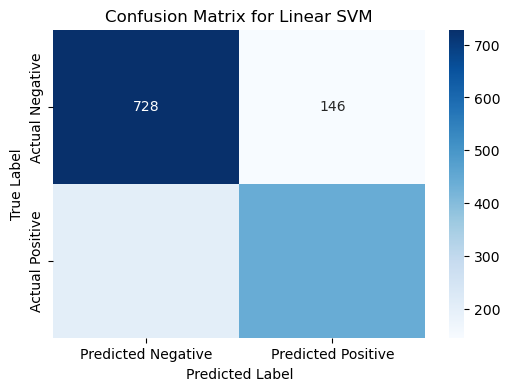

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.788575   0.800000  0.671803  0.730318
1          Naive Bayes  0.797768   0.812844  0.682589  0.742044
2           Linear SVM  0.768221   0.751701  0.681048  0.714632


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 

# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Linear SVM': LinearSVC()
}
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42) # Split data here
# Results dataframe
results = [] 
# Training and evaluating each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    # Create and display confusion matrix for the current model
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
# Create DataFrame and Display
results = pd.DataFrame(results)
print(results)

Tuning Logistic Regression...


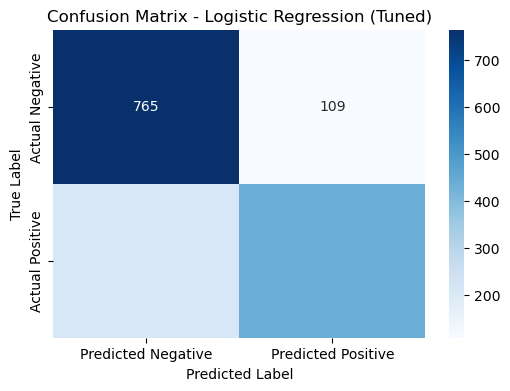

Tuning Naive Bayes...


In [ ]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Naive Bayes': {
        'alpha': [0.1, 0.5, 1.0]  # Smoothing parameter
    },
    'Linear SVM': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']  # Regularization type
    }
}

# Models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Linear SVM': LinearSVC()
}

# Results dataframe
results = []

# Train and evaluate each model with hyperparameter tuning
for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')

    # Fit to training data
    grid_search.fit(X_train, y_train)

    # Get best model and predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calculate and store metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Best Parameters': grid_search.best_params_
    })

    cm = confusion_matrix(y_test, y_pred)

    # Save the best model
    model_filename = f"{model_name.replace(' ', '_')}_model.pkl"  # Create filename
    with open(model_filename, 'wb') as model_file:
        pickle.dump(best_model, model_file)
    # Save the vectorizer (assuming you're using a single vectorizer for all models)
    vectorizer_filename = f"{model_name.replace(' ', '_')}_vectorizer.pkl"
    with open(vectorizer_filename, 'wb') as vectorizer_file:
        pickle.dump(vectorizer_tfidf, vectorizer_file)  # Use vectorizer_tfidf here


    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title(f"Confusion Matrix - {model_name} (Tuned)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


# Create DataFrame from the list
results_df = pd.DataFrame(results)

# Display results
print("\nPerformance Comparison after Tuning:")
print(results_df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV # Import CalibratedClassifierCV


plt.figure(figsize=(10, 8))

for model_name in models.keys():
    # Get the tuned model parameters from the results
    tuned_model_params = results_df[results_df['Model'] == model_name]['Best Parameters'].iloc[0]

    #Recreate the best model
    if model_name == "Logistic Regression":
        tuned_model = LogisticRegression(**tuned_model_params)
    elif model_name == "Naive Bayes":
        tuned_model = MultinomialNB(**tuned_model_params)
    elif model_name == "Linear SVM":
        # Create a base LinearSVC model with tuned parameters
        base_model = LinearSVC(**tuned_model_params)
        # Wrap it with CalibratedClassifierCV to enable predict_proba
        tuned_model = CalibratedClassifierCV(base_model, method='sigmoid') # Using CalibratedClassifierCV

    # Fit the tuned model
    tuned_model.fit(X_train, y_train)

    # ROC Curve
    y_pred_prob = tuned_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall, precision, linestyle='--', label=f'{model_name} (PR)')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')  # Random classifier
plt.xlabel('False Positive Rate / Recall')
plt.ylabel('True Positive Rate / Precision')
plt.title('ROC and Precision-Recall Curves')
plt.legend(loc="lower right")
plt.show()